# Pacotes

In [ ]:
#!pip install matplotlib scipy seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import zipfile
sns.set_theme(style="ticks")

# Leitura da base de dados

In [4]:
zf = zipfile.ZipFile('credit-card-customers.zip') 
dados = pd.read_csv(zf.open('BankChurners.csv'))
dados = dados.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Volumetria e tipagem dos dados

In [ ]:
# Total

dados.shape

(10127, 21)

In [ ]:
# Dados duplicados

dados.duplicated().sum()

np.int64(0)

In [ ]:
# Identifica existência de números de cliente iguais
# Retiramos qualquer espaços em branco 

len(dados['CLIENTNUM'].replace(" ", "").unique())

10127

In [ ]:
# Nenhuma observação com dado faltante e tipagem das variáveis

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Análise descritiva e exploratória

In [10]:
def conta_categorias(variavel, df):
    # variavel = string
    # df = pandas dataframe
    versao1 = pd.DataFrame(df[variavel].value_counts()).reset_index().sort_values(by=variavel)
    versao2 = pd.DataFrame(df[variavel].value_counts()/df.shape[0]*100).reset_index().sort_values(by=variavel)
    # return [df[variavel].value_counts(), df[variavel].value_counts()/df.shape[0]*100]
    return(versao1, versao2)

def plot_histograma(variavel, df):
    # variavel = string
    # df = pandas dataframe
    # Plotando um histograma básico
    plt.hist(df[variavel], color='skyblue', edgecolor='black')
     
    # Adicionando legenda e títulos
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title('Histograma')
     
    # Display do plot
    plt.show()

## Variáveis categóricas

In [ ]:
# 16% dos clientes deixaram de usar o serviço de cartão de crédito (churn)

conta_categorias('Attrition_Flag', dados)

(      Attrition_Flag  count
 1  Attrited Customer   1627
 0  Existing Customer   8500,
       Attrition_Flag      count
 1  Attrited Customer  16.065962
 0  Existing Customer  83.934038)

In [ ]:
# Distribuição dos clientes por nível educacional
# Podemos pensar nos agrupamentos: College + Graduate (~40.9%), Post-Graduate + Doctorate (~9.5%) e manteríamos unknown (~14.9%), uneducated (~14.7%) e high school (~19.9%)

conta_categorias('Education_Level', dados)

(  Education_Level  count
 4         College   1013
 6       Doctorate    451
 0        Graduate   3128
 1     High School   2013
 5   Post-Graduate    516
 3      Uneducated   1487
 2         Unknown   1519,
   Education_Level      count
 4         College  10.002962
 6       Doctorate   4.453441
 0        Graduate  30.887726
 1     High School  19.877555
 5   Post-Graduate   5.095290
 3      Uneducated  14.683519
 2         Unknown  14.999506)

In [ ]:
# Distribuição dos clientes por categoria de renda

conta_categorias('Income_Category', dados)

(  Income_Category  count
 5         $120K +    727
 1     $40K - $60K   1790
 3     $60K - $80K   1402
 2    $80K - $120K   1535
 0  Less than $40K   3561
 4         Unknown   1112,
   Income_Category      count
 5         $120K +   7.178829
 1     $40K - $60K  17.675521
 3     $60K - $80K  13.844179
 2    $80K - $120K  15.157500
 0  Less than $40K  35.163425
 4         Unknown  10.980547)

In [ ]:
# Distribuição dos clientes por sexo

conta_categorias('Gender', dados)

(  Gender  count
 0      F   5358
 1      M   4769,
   Gender      count
 0      F  52.908068
 1      M  47.091932)

In [ ]:
# Distribuição dos clientes por estado civil

conta_categorias('Marital_Status', dados)

(  Marital_Status  count
 3       Divorced    748
 0        Married   4687
 1         Single   3943
 2        Unknown    749,
   Marital_Status      count
 3       Divorced   7.386195
 0        Married  46.282216
 1         Single  38.935519
 2        Unknown   7.396070)

In [ ]:
# Distribuição dos clientes por quantidade de dependentes

conta_categorias('Dependent_count', dados)

(   Dependent_count  count
 4                0    904
 2                1   1838
 1                2   2655
 0                3   2732
 3                4   1574
 5                5    424,
    Dependent_count      count
 4                0   8.926632
 2                1  18.149501
 1                2  26.217044
 0                3  26.977387
 3                4  15.542609
 5                5   4.186827)

In [49]:
# Distribuição dos clientes por tipo de cartão

conta_categorias('Card_Category', dados)

(  Card_Category  count
 0          Blue   9436
 2          Gold    116
 3      Platinum     20
 1        Silver    555,
   Card_Category      count
 0          Blue  93.176656
 2          Gold   1.145453
 3      Platinum   0.197492
 1        Silver   5.480399)

In [ ]:
# Quantidade total de produtos que o cliente tem (aqui não fica claro se são produtos de crédito como empréstimos, financiamentos etc ou se existe também seguros, consórcios etc)
# 54% dos clientes têm pelo menos 4 produtos. Pode ser que seja a principal instituição financeira do cliente.
# Clientes com menos produtos são os que realmente tendem a ser churn?

conta_categorias('Total_Relationship_Count', dados)

(   Total_Relationship_Count  count
 5                         1    910
 4                         2   1243
 0                         3   2305
 1                         4   1912
 2                         5   1891
 3                         6   1866,
    Total_Relationship_Count      count
 5                         1   8.985879
 4                         2  12.274119
 0                         3  22.760936
 1                         4  18.880221
 2                         5  18.672855
 3                         6  18.425990)

In [ ]:
# Quantidade de meses inativos nos últimos 12 meses. Uso ou ausência de uso nos meses.
# Poucos clientes (29) usaram todos os 12 meses (clientes que possuem algum usam algum serviço e utilizam pagam com crédito recorrente)
# Pode-se pensar que os clientes que deixaram de usar até 2 vezes nos últimos 12 meses o cartão (54%) tem alta principalidade ou esse banco é a principal instituição financeira do cliente
# Clientes com mais tempo de inatividade são os que realmente tendem a ser churn?

conta_categorias('Months_Inactive_12_mon', dados)

(   Months_Inactive_12_mon  count
 6                       0     29
 2                       1   2233
 1                       2   3282
 0                       3   3846
 3                       4    435
 4                       5    178
 5                       6    124,
    Months_Inactive_12_mon      count
 6                       0   0.286363
 2                       1  22.049965
 1                       2  32.408413
 0                       3  37.977683
 3                       4   4.295448
 4                       5   1.757677
 5                       6   1.224449)

In [ ]:
# Quantidade de contatos nos últimos 12 meses (supondo contato telefônico e que a informação cadastral esteja atualizada/hot)
# Contato para oferta de produto? Contato para cobrança? Contato de reclamação do cliente?
# 77% dos clientes receberam de 2-4 contatos nos últimos 12 meses

conta_categorias('Contacts_Count_12_mon', dados)

(   Contacts_Count_12_mon  count
 4                      0    399
 2                      1   1499
 1                      2   3227
 0                      3   3380
 3                      4   1392
 5                      5    176
 6                      6     54,
    Contacts_Count_12_mon      count
 4                      0   3.939962
 2                      1  14.802014
 1                      2  31.865311
 0                      3  33.376123
 3                      4  13.745433
 5                      5   1.737928
 6                      6   0.533228)

In [27]:
lista_educacao_v1 = {
    'Unknown' : '0.Unknown',
    'Uneducated': '1.Uneducated',
    'High School': '2.High School',
    'College': '3.College',
    'Graduate': '4.Graduate',
    'Post-Graduate': '5.Post-Graduate',
    'Doctorate': '6.Doctorate'
}

lista_educacao_v2 = {
    'Unknown' : '0.Unknown',
    'Uneducated': '1.Uneducated',
    'High School': '2.High School',
    'College': '3.Graduate',
    'Graduate': '3.Graduate',
    'Post-Graduate': '4.Post-Graduate',
    'Doctorate': '4.Post-Graduate'
}

lista_renda = {
    'Unknown': '0.Unknown',
    'Less than $40K': '1.< 40k',
    '$40K - $60K': '2. >= 40k & < 60k',
    '$60K - $80K': '3. >= 60k & < 80k',
    '$80K - $120K': '4. >= 80k & < 120k',
    '$120K +': '5. >= 120k'
}

In [28]:
dados['Education_Level_v1'] = dados['Education_Level'].map(lista_educacao_v1)
dados['Education_Level_v2'] = dados['Education_Level'].map(lista_educacao_v2)
dados['Income_Category'] = dados['Income_Category'].map(lista_renda)

In [31]:
conta_categorias('Education_Level_v1', dados)

(  Education_Level_v1  count
 2          0.Unknown   1519
 3       1.Uneducated   1487
 1      2.High School   2013
 4          3.College   1013
 0         4.Graduate   3128
 5    5.Post-Graduate    516
 6        6.Doctorate    451,
   Education_Level_v1      count
 2          0.Unknown  14.999506
 3       1.Uneducated  14.683519
 1      2.High School  19.877555
 4          3.College  10.002962
 0         4.Graduate  30.887726
 5    5.Post-Graduate   5.095290
 6        6.Doctorate   4.453441)

In [32]:
conta_categorias('Education_Level_v2', dados)

(  Education_Level_v2  count
 2          0.Unknown   1519
 3       1.Uneducated   1487
 1      2.High School   2013
 0         3.Graduate   4141
 4    4.Post-Graduate    967,
   Education_Level_v2      count
 2          0.Unknown  14.999506
 3       1.Uneducated  14.683519
 1      2.High School  19.877555
 0         3.Graduate  40.890688
 4    4.Post-Graduate   9.548731)

In [30]:
conta_categorias('Income_Category', dados)

(      Income_Category  count
 4           0.Unknown   1112
 0             1.< 40k   3561
 1   2. >= 40k & < 60k   1790
 3   3. >= 60k & < 80k   1402
 2  4. >= 80k & < 120k   1535
 5          5. >= 120k    727,
       Income_Category      count
 4           0.Unknown  10.980547
 0             1.< 40k  35.163425
 1   2. >= 40k & < 60k  17.675521
 3   3. >= 60k & < 80k  13.844179
 2  4. >= 80k & < 120k  15.157500
 5          5. >= 120k   7.178829)

In [ ]:
# Tabela cruzada entre faixa de renda e nível educacional (total por coluna)
# Fixado o nível educacional e desconsiderando as demais variáveis, não vemos diferenças grandes em relação a distribuição dos clientes nas categorias de renda
# Expectativa: maiores faixas salariais para os maiores níveis educacionais?

pd.crosstab(dados['Income_Category'], dados['Education_Level_v1'], margins = True, normalize='columns') 

Education_Level_v1,0.Unknown,1.Uneducated,2.High School,3.College,4.Graduate,5.Post-Graduate,6.Doctorate,All
Income_Category,,,,,,,,
0.Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211,0.109805
1.< 40k,0.366030,0.351042,0.333333,0.340573,0.364130,0.329457,0.350333,0.351634
2. >= 40k & < 60k,0.177090,0.167451,0.176354,0.180652,0.176790,0.215116,0.155211,0.176755
3. >= 60k & < 80k,0.138249,0.131137,0.152509,0.130306,0.134910,0.149225,0.130820,0.138442
4. >= 80k & < 120k,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386,0.151575
5. >= 120k,0.078999,0.080027,0.073025,0.069102,0.065217,0.058140,0.082040,0.071788


In [ ]:
# Mesmo agrupando alguns níveis educacionais, também não vemos grandes diferenças em relação a distribuição dos clientes nas categorias de renda

pd.crosstab(dados['Income_Category'], dados['Education_Level_v2'], margins = True, normalize='columns') 

Education_Level_v2,0.Unknown,1.Uneducated,2.High School,3.Graduate,4.Post-Graduate,All
Income_Category,,,,,,
0.Unknown,0.095458,0.124412,0.111773,0.106255,0.120993,0.109805
1.< 40k,0.366030,0.351042,0.333333,0.358368,0.339193,0.351634
2. >= 40k & < 60k,0.177090,0.167451,0.176354,0.177735,0.187177,0.176755
3. >= 60k & < 80k,0.138249,0.131137,0.152509,0.133784,0.140641,0.138442
4. >= 80k & < 120k,0.144174,0.145931,0.153005,0.157691,0.142709,0.151575
5. >= 120k,0.078999,0.080027,0.073025,0.066168,0.069286,0.071788


In [ ]:
# Tabela cruzada entre faixa de renda e nível educacional (total por linha)
# Fixado a categoria de renda e desconsiderando as demais variáveis, não vemos grandes diferenças em relação a distribuição dos clientes em relação ao nível educacional

pd.crosstab(dados['Income_Category'], dados['Education_Level_v1'], margins = True, normalize='index') 

Education_Level_v1,0.Unknown,1.Uneducated,2.High School,3.College,4.Graduate,5.Post-Graduate,6.Doctorate
Income_Category,,,,,,,
0.Unknown,0.130396,0.166367,0.202338,0.097122,0.298561,0.042266,0.062950
1.< 40k,0.156136,0.146588,0.188430,0.096883,0.319854,0.047739,0.044370
2. >= 40k & < 60k,0.150279,0.139106,0.198324,0.102235,0.308939,0.062011,0.039106
3. >= 60k & < 80k,0.149786,0.139087,0.218973,0.094151,0.300999,0.054922,0.042083
4. >= 80k & < 120k,0.142671,0.141368,0.200651,0.114007,0.311401,0.052769,0.037134
5. >= 120k,0.165062,0.163686,0.202201,0.096286,0.280605,0.041265,0.050894
All,0.149995,0.146835,0.198776,0.100030,0.308877,0.050953,0.044534


In [36]:
pd.crosstab(dados['Income_Category'], dados['Education_Level_v2'], margins = True, normalize='index') 

Education_Level_v2,0.Unknown,1.Uneducated,2.High School,3.Graduate,4.Post-Graduate
Income_Category,,,,,
0.Unknown,0.130396,0.166367,0.202338,0.395683,0.105216
1.< 40k,0.156136,0.146588,0.188430,0.416737,0.092109
2. >= 40k & < 60k,0.150279,0.139106,0.198324,0.411173,0.101117
3. >= 60k & < 80k,0.149786,0.139087,0.218973,0.395150,0.097004
4. >= 80k & < 120k,0.142671,0.141368,0.200651,0.425407,0.089902
5. >= 120k,0.165062,0.163686,0.202201,0.376891,0.092160
All,0.149995,0.146835,0.198776,0.408907,0.095487


In [ ]:
# Tabela cruzada entre quantidade de meses inativos nos últimos 12 meses e quantidade de contato nos últimos 12 meses (total por coluna)
# Fixado a quantidade de contatos e desconsiderando as demais variáveis, não vemos diferenças grandes em relação a distribuição dos clientes nos meses inativos nos últimos 12 meses

pd.crosstab(dados['Months_Inactive_12_mon'], dados['Contacts_Count_12_mon'], margins = True, normalize='columns') 

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Months_Inactive_12_mon,,,,,,,,
0,0.005013,0.003336,0.001549,0.003254,0.003592,0.000000,0.018519,0.002864
1,0.250627,0.242829,0.224047,0.215976,0.204741,0.170455,0.018519,0.220500
2,0.303258,0.316878,0.329718,0.321006,0.331178,0.335227,0.314815,0.324084
3,0.385965,0.356237,0.378370,0.381065,0.392241,0.414773,0.555556,0.379777
4,0.027569,0.044029,0.039975,0.047633,0.040948,0.045455,0.055556,0.042954
5,0.015038,0.020013,0.017354,0.018047,0.015086,0.017045,0.018519,0.017577
6,0.012531,0.016678,0.008987,0.013018,0.012213,0.017045,0.018519,0.012244


In [ ]:
# Tabela cruzada entre quantidade de meses inativos nos últimos 12 meses e quantidade de contato nos últimos 12 meses (total por linha)
# Fixado a quantidade de meses inativos e desconsiderando as demais variáveis, não vemos diferenças grandes em relação a distribuição dos clientes nas quantidades de contatos nos últimos 12 meses

pd.crosstab(dados['Months_Inactive_12_mon'], dados['Contacts_Count_12_mon'], margins = True, normalize='index') 

Contacts_Count_12_mon,0,1,2,3,4,5,6
Months_Inactive_12_mon,,,,,,,
0,0.068966,0.172414,0.172414,0.379310,0.172414,0.000000,0.034483
1,0.044783,0.163009,0.323780,0.326914,0.127631,0.013435,0.000448
2,0.036868,0.144729,0.324193,0.330591,0.140463,0.017977,0.005180
3,0.040042,0.138846,0.317473,0.334893,0.141966,0.018981,0.007800
4,0.025287,0.151724,0.296552,0.370115,0.131034,0.018391,0.006897
5,0.033708,0.168539,0.314607,0.342697,0.117978,0.016854,0.005618
6,0.040323,0.201613,0.233871,0.354839,0.137097,0.024194,0.008065
All,0.039400,0.148020,0.318653,0.333761,0.137454,0.017379,0.005332


### Variáveis categóricas e target

In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e nível educacional
# Pouca diferença é vista na proporção da variável target condicionado ao nível educacional. Talvez, pudéssemos observar que exista alguma diferença significativa entre o nível educacional
# Doutorado e os demais níveis educacionais

pd.crosstab(dados['Attrition_Flag'], dados['Education_Level_v1'], margins = True, normalize='columns') 

Education_Level_v1,0.Unknown,1.Uneducated,2.High School,3.College,4.Graduate,5.Post-Graduate,6.Doctorate,All
Attrition_Flag,,,,,,,,
Attrited Customer,0.168532,0.159381,0.152012,0.152024,0.155691,0.178295,0.210643,0.16066
Existing Customer,0.831468,0.840619,0.847988,0.847976,0.844309,0.821705,0.789357,0.83934


In [ ]:
# Observação similar a feita anteriormente

pd.crosstab(dados['Attrition_Flag'], dados['Education_Level_v2'], margins = True, normalize='columns') 

Education_Level_v2,0.Unknown,1.Uneducated,2.High School,3.Graduate,4.Post-Graduate,All
Attrition_Flag,,,,,,
Attrited Customer,0.168532,0.159381,0.152012,0.154794,0.193382,0.16066
Existing Customer,0.831468,0.840619,0.847988,0.845206,0.806618,0.83934


In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e faixa de renda
# Pouca diferença é vista na proporção da variável target condicionado a faixa de renda
# Expectativa: considere o mesmo tempo de casa entre os clientes, assim como a mesma representatividade em quantidade absoluta. Quanto menor a faixa de renda, esperaríamos uma maior 
# Proporção de churn? Considerando a baixa renda, isso podería estar relacionado com a procura por crédito no mercado pelo cliente

pd.crosstab(dados['Attrition_Flag'], dados['Income_Category'], margins = True, normalize='columns') 

Income_Category,0.Unknown,1.< 40k,2. >= 40k & < 60k,3. >= 60k & < 80k,4. >= 80k & < 120k,5. >= 120k,All
Attrition_Flag,,,,,,,
Attrited Customer,0.168165,0.171862,0.151397,0.134807,0.157655,0.173315,0.16066
Existing Customer,0.831835,0.828138,0.848603,0.865193,0.842345,0.826685,0.83934


In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e quantidade de meses inativos nos últimos 12 meses
# Fixado a quantidade de meses inativos nos últimos 12 meses é possível identificar diferença na proporção de churn dos clientes
# Expectativa: quanto mais meses inativos, maior a proporção de churn dos clientes. Existem algumas inversões dos valores de proporção, por exemplo, um valor de 52% de churn 
# Para os clientes com 0 mês de inatividade e 4% para os clientes com 1 mês de inatividade
# É importante notar também que a volumetria é muito baixa para meses de inatividade igual a zero e baixa para os meses de inatividade igual a 4, 5 e 6

pd.crosstab(dados['Attrition_Flag'], dados['Months_Inactive_12_mon'], margins = True, normalize='columns') 

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Attrition_Flag,,,,,,,,
Attrited Customer,0.517241,0.044783,0.15387,0.214769,0.298851,0.179775,0.153226,0.16066
Existing Customer,0.482759,0.955217,0.84613,0.785231,0.701149,0.820225,0.846774,0.83934


In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e quantidade de contatos nos últimos 12 meses
# É possível ver que quanto maior a quantidade de contato nos últimos 12 meses, maior a proporção de clientes que são churn. Talvez, possa ser a tentativa de "resgate" ou "recuperação"
# Do cliente. É necessário lembrar também que a volumetria de clientes é muito baixa na quantidade de contatos igual a 5 e 6

pd.crosstab(dados['Attrition_Flag'], dados['Contacts_Count_12_mon'], margins = True, normalize='columns') 

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Attrition_Flag,,,,,,,,
Attrited Customer,0.017544,0.072048,0.124884,0.201479,0.226293,0.335227,1.0,0.16066
Existing Customer,0.982456,0.927952,0.875116,0.798521,0.773707,0.664773,0.0,0.83934


In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e estado civil
# Não é possível observar diferenças muito grandes em relação a proporção de clientes que são churn, fixado um estado civil

pd.crosstab(dados['Attrition_Flag'], dados['Marital_Status'], margins = True, normalize='columns') 

Marital_Status,Divorced,Married,Single,Unknown,All
Attrition_Flag,,,,,
Attrited Customer,0.161765,0.151269,0.169414,0.17223,0.16066
Existing Customer,0.838235,0.848731,0.830586,0.82777,0.83934


In [ ]:
# Tabela cruzada da variável target (Attrition_Flag) e quantidade de dependentes
# Não é possível observar diferenças muito grandes em relação a proporção de clientes que são churn, fixado a quantidade de dependentes

pd.crosstab(dados['Attrition_Flag'], dados['Dependent_count'], margins = True, normalize='columns') 

Dependent_count,0,1,2,3,4,5,All
Attrition_Flag,,,,,,,
Attrited Customer,0.149336,0.146355,0.157062,0.176428,0.165184,0.150943,0.16066
Existing Customer,0.850664,0.853645,0.842938,0.823572,0.834816,0.849057,0.83934


## Variáveis numéricas

In [ ]:
# Months_on_book: tempo de relacionamento com o banco
# Total_Revolving_Bal: saldo rotativo total
# Avg_Open_To_Buy: 
# Total_Amt_Chng_Q4_Q1:
# Total_Trans_Amt:
# Total_Trans_Ct: 
# Total_Ct_Chng_Q4_Q1:
# Avg_Utilization_Ratio:

vars_numericas = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [39]:
# Total_Relationship_Count variável categórica numérica
df_transforma.describe()

,Customer_Age,Credit_Limit,Months_on_book,Total_Relationship_Count,Total_Trans_Amt,Total_Trans_Ct,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,35.928409,3.812580,4404.086304,64.858695,2.341167,2.455317,1162.814061,0.274894
std,8.016814,9088.776650,7.986416,1.554408,3397.129254,23.472570,1.010622,1.106225,814.987335,0.275691
min,26.000000,1438.300000,13.000000,1.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,2555.000000,31.000000,3.000000,2155.500000,45.000000,2.000000,2.000000,359.000000,0.023000
50%,46.000000,4549.000000,36.000000,4.000000,3899.000000,67.000000,2.000000,2.000000,1276.000000,0.176000
75%,52.000000,11067.500000,40.000000,5.000000,4741.000000,81.000000,3.000000,3.000000,1784.000000,0.503000
max,73.000000,34516.000000,56.000000,6.000000,18484.000000,139.000000,6.000000,6.000000,2517.000000,0.999000


## Cria variável
- Relação entre Total_Trans_Amt/Total_Trans_Ct: indica o valor financeiro médio por transação nos últimos 12 meses

In [40]:
# vfm = valor financeiro médio por transação nos últimos 12 meses, como se fosse o ticket médio por operação em 12 meses
df_transforma['vfm'] = df_transforma['Total_Trans_Amt']/df_transforma['Total_Trans_Ct']

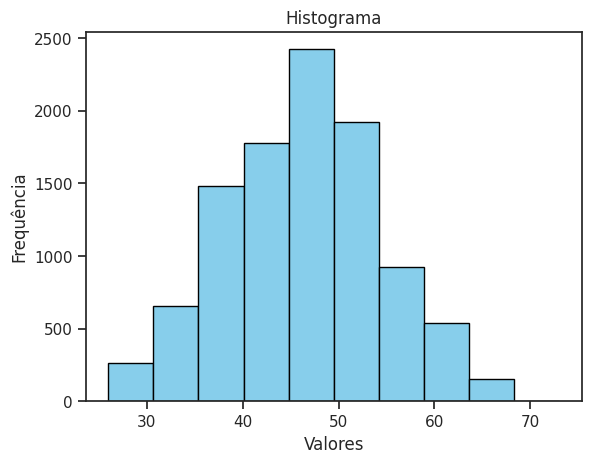

In [41]:
plot_histograma('Customer_Age', df_transforma)

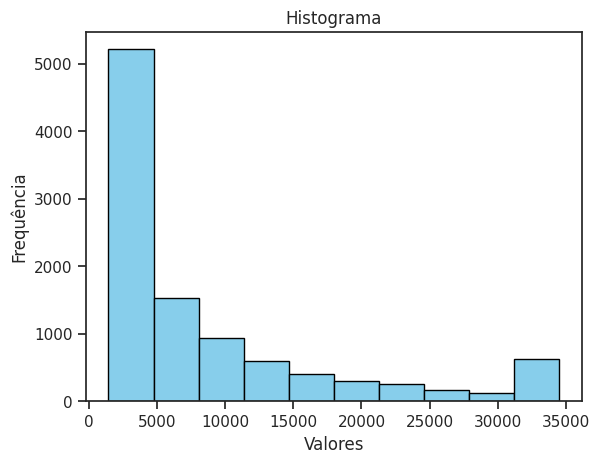

In [42]:
plot_histograma('Credit_Limit', df_transforma)

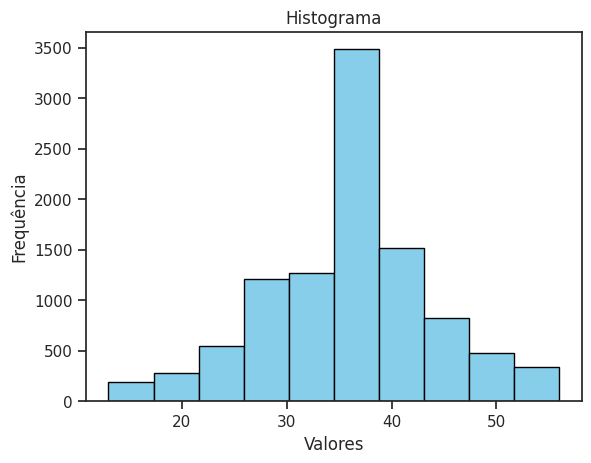

In [43]:
plot_histograma('Months_on_book', df_transforma)

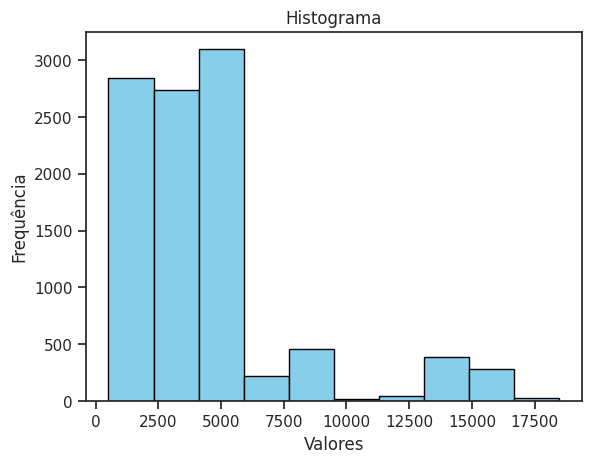

In [44]:
plot_histograma('Total_Trans_Amt', df_transforma)

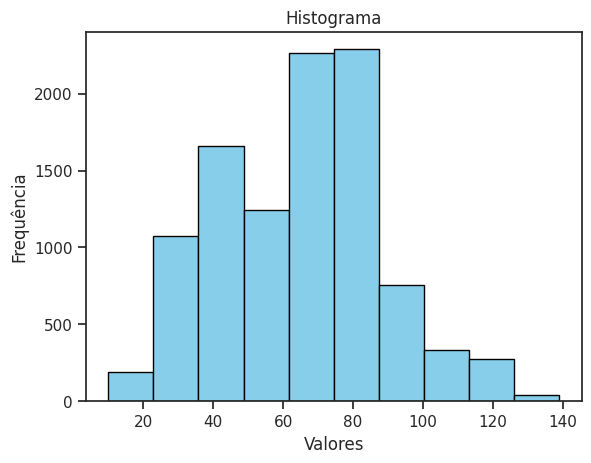

In [45]:
plot_histograma('Total_Trans_Ct', df_transforma)

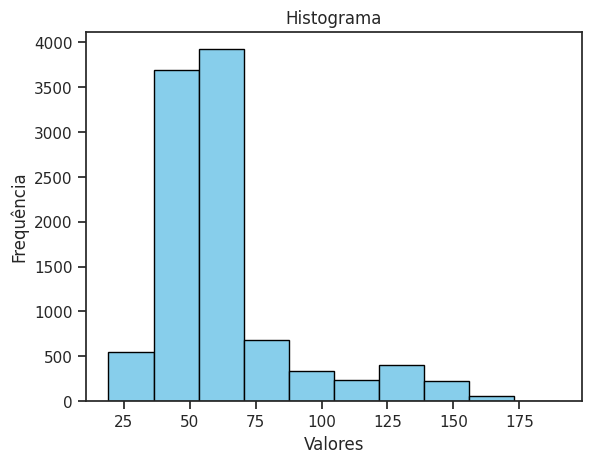

In [46]:
plot_histograma('vfm', df_transforma)

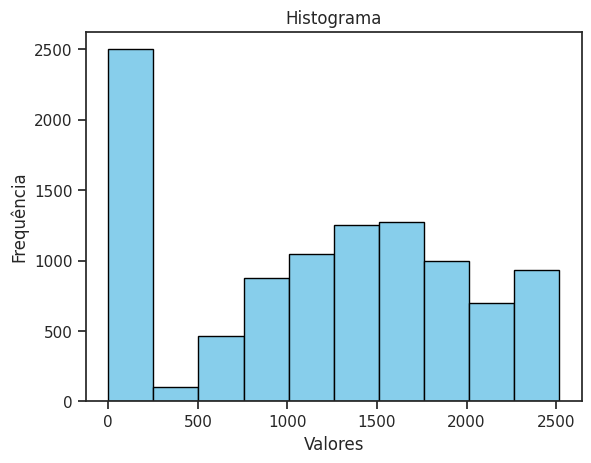

In [49]:
plot_histograma('Total_Revolving_Bal', df_transforma)

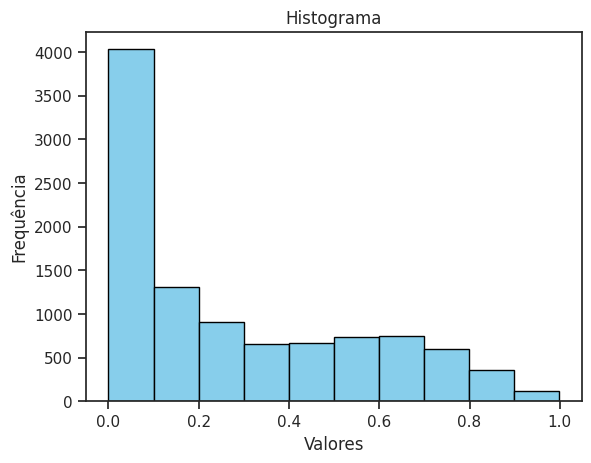

In [50]:
plot_histograma('Avg_Utilization_Ratio', df_transforma)

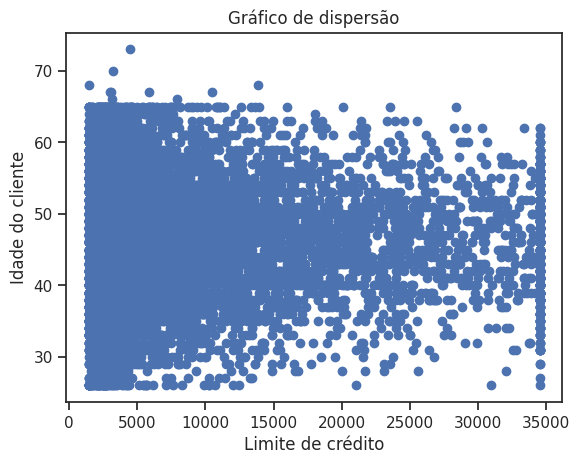

In [51]:
plt.scatter(df_transforma['Credit_Limit'], df_transforma['Customer_Age'])
plt.xlabel('Limite de crédito')
plt.ylabel('Idade do cliente')
plt.title('Gráfico de dispersão')
plt.show()

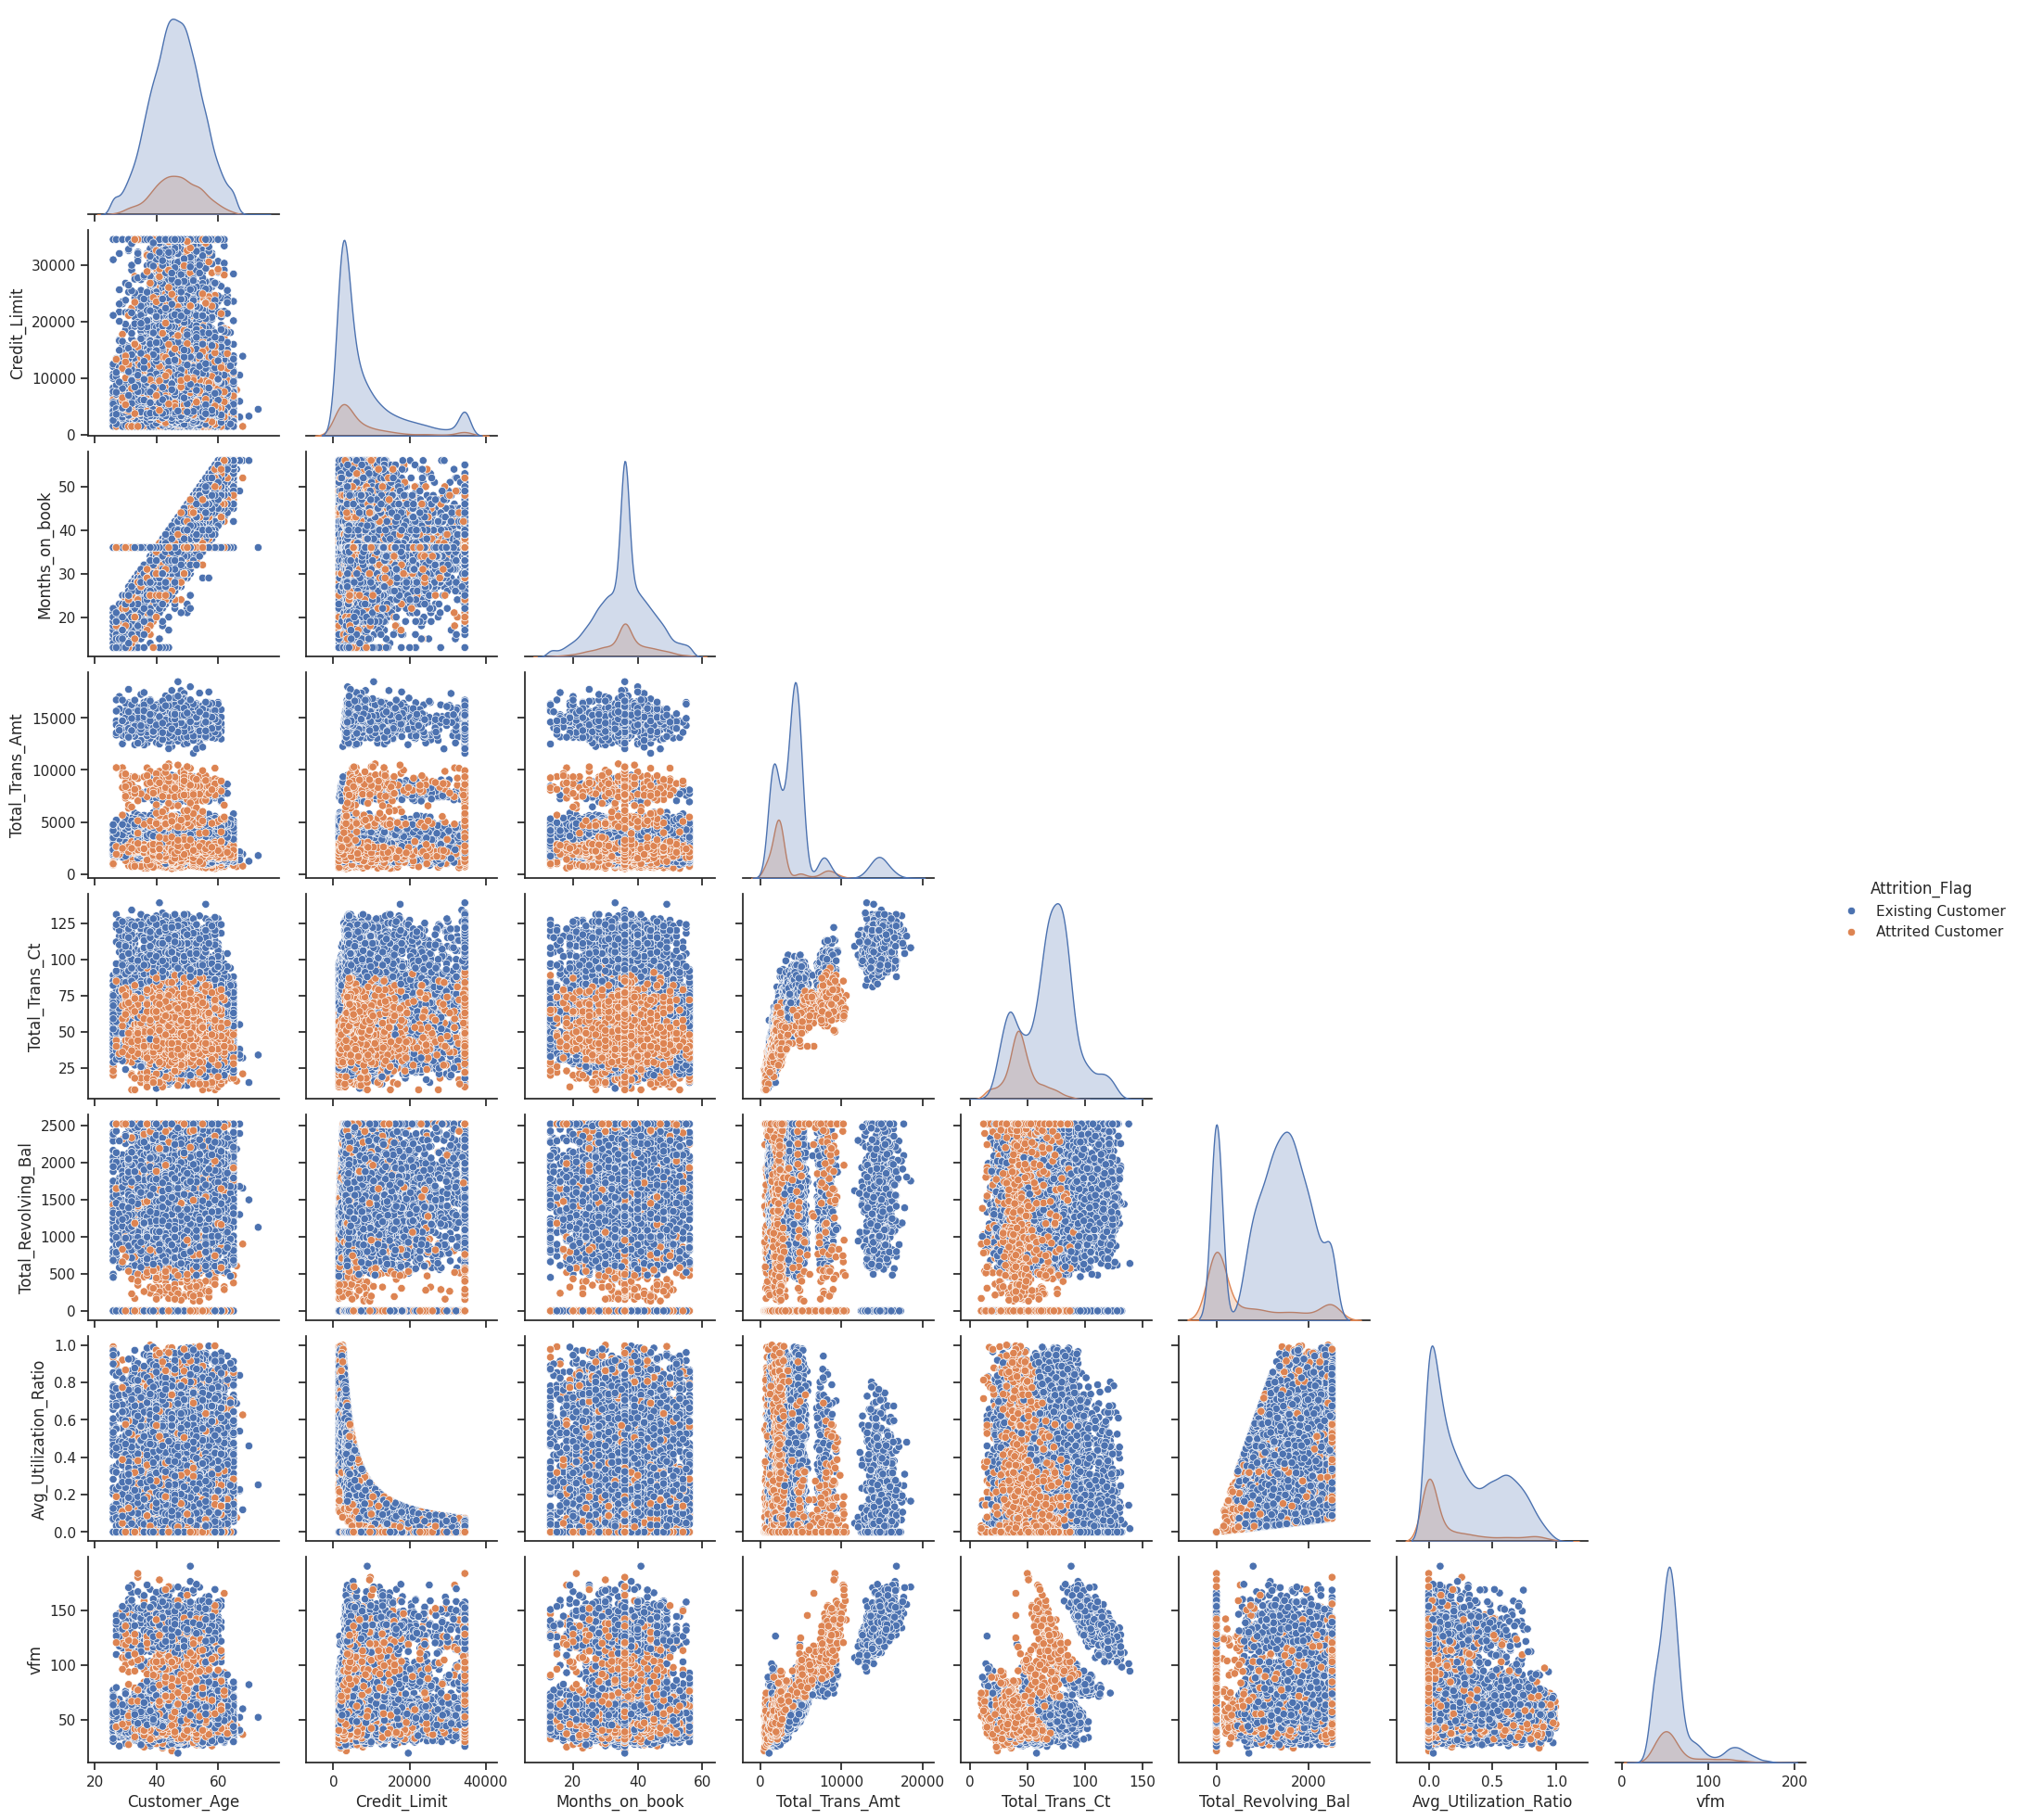

In [54]:
numericas = pd.concat([df_transforma.select_dtypes(exclude = 'object'), df_transforma['Attrition_Flag']], axis = 1).drop(['Total_Relationship_Count', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon'], axis = 1)
sns.pairplot(numericas, hue="Attrition_Flag", corner = True)

- Na coluna referente à idade (coluna = 0): aparentemente, observamos uma relação linear entre idade e tempo de relacionamento com o banco; ao olhar o total de transações financeiras, vemos que valores aproximadamente acima de 10.500,00 temos clientes que não são churn e entre 5.500,00 e 10.000,00 identificamos uma concentração de clientes que são churn.

- Na coluna referente à limite de cartão de crédito (coluna 1): aparentemente temos muitos clientes com o mesmo valor de limite de cartão, como podemos ver nos valores próximos à 3.800,00; é provável que clientes com quantidade de transações acima de ~95 são clientes que não são churn; note a relação exponencial e decrescente do limite de cartão de crédito com o uso médio do cartão de crédito;nenhuma relação com as demais variáveis é observada.

- Na coluna referente à tempo de relacionamento (coluna 2): não identificamos padrões entre as variáveis.

- Na coluna referente à total de transações financeiras (coluna 3): identificamos uma relação linear entre volume financeiro e quantidade de transações e uma relação entre volume financeiro e o vfm (valor financeiro médio).

- Na coluna referente à contagem de transações financeiras (coluna 4): identificamos que existe uma relação monótona entre esta variável e o vfm (valor financeiro médio).

- Na coluna referente à saldo total de rotativo (coluna 5): identificamos uma relação linear entre o aumento do saldo rotativo com o aumento da proporção de uso do cartão de crédito.

In [67]:
coef, p = spearmanr(df_transforma['Credit_Limit'], df_transforma['Customer_Age'])
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.002


In [68]:
# As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are uncorrelated (fail to reject H0) p=0.867


<Axes: >

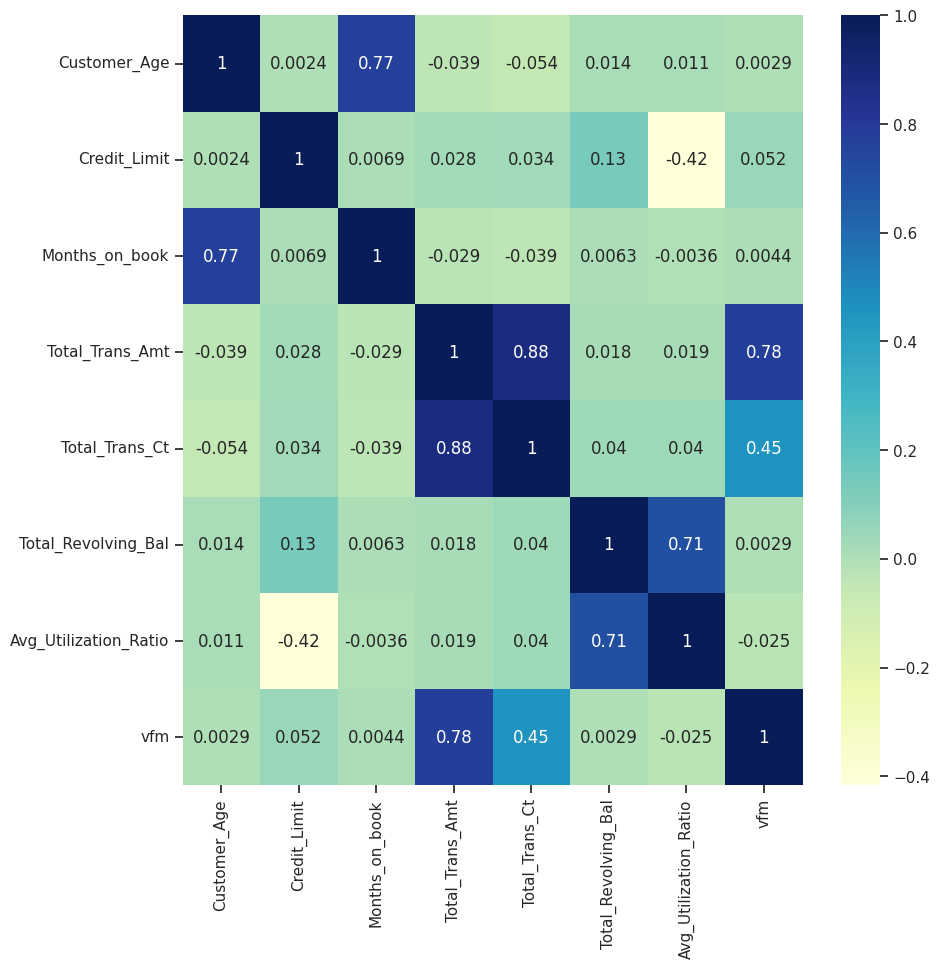

In [60]:
# numericas.drop(['Attrition_Flag'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(numericas.corr(method = 'spearman'), cmap="YlGnBu", annot=True)